# Chapter 1: Plotting Demo

[JP Gannon](https://jpgannon.github.io/)
[](https://orcid.org/0000-0002-4595-3214)
([Virginia Tech](https://www.vt.edu/))  
2026-01-12

# Intro to Plotting

Get this document and a version with empty code chunks at the template
repository on github:
<https://github.com/VT-Hydroinformatics/1-Intro-plotting-R>

## Download and install tidyverse library

We will use the tidyverse a lot this semester. It is a suite of packages
that handles plotting and data wrangling efficiently.

You only have to install the library once. You have to load it using the
library() function each time you start an R session.

In [ ]:
#install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

## Reading data

The following lines will read in the data we will use for this exercise.
Don’t worry about this right now beyond running it, we will talk more
about it later.

In [ ]:
Pine <- read_csv("PINE_Jan-Mar_2010.csv") 

Rows: 2160 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): StationID, surrogate
dbl  (5): cfs, year, quarter, month, day
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 4320 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): StationID, surrogate
dbl  (5): cfs, year, quarter, month, day
dttm (1): datetime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 49 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STANAME, STATE, CLASS, AGGECOREGION
dbl (22): site_no, RBI, RBIrank, DRAIN_SQKM, HUC02, LAT_GAGE, LNG_GAGE, PPTA...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

\`\`\`rulchuyy images/GGplot_syntax.png :alt: GGplot syntax graphic

GGplot syntax.



    ## Our first ggplot

    Let's look at the Pine data, plotting streamflow (the cfs column) by the date (datetime column). We will show the time series as a line.



    ::: {.cell}

    ```{.r .cell-code}
    ggplot(data = Pine, aes(x = datetime, y = cfs))+
      geom_line()

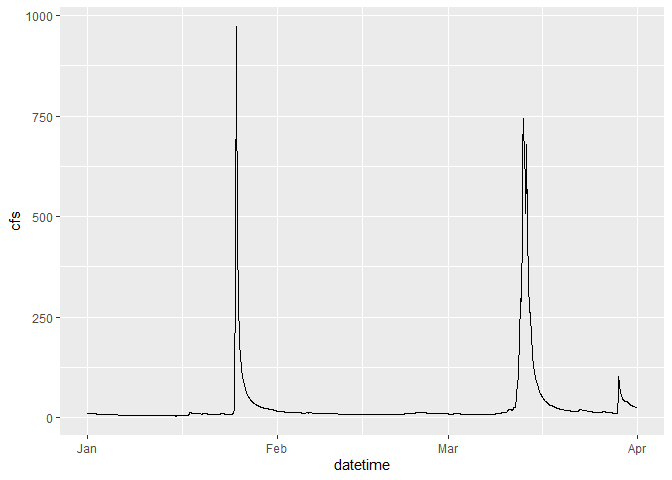

:::

## Change point type

Now let’s make the same plot but show the data as points, using the pch
parameter in geom_point() we can change the point type to any of the
following:

<figure id="fig-pch">
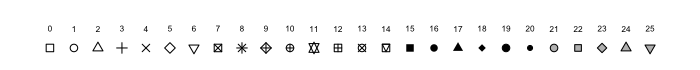
<figcaption>Figure 1: Pch values and points from R help
file</figcaption>
</figure>

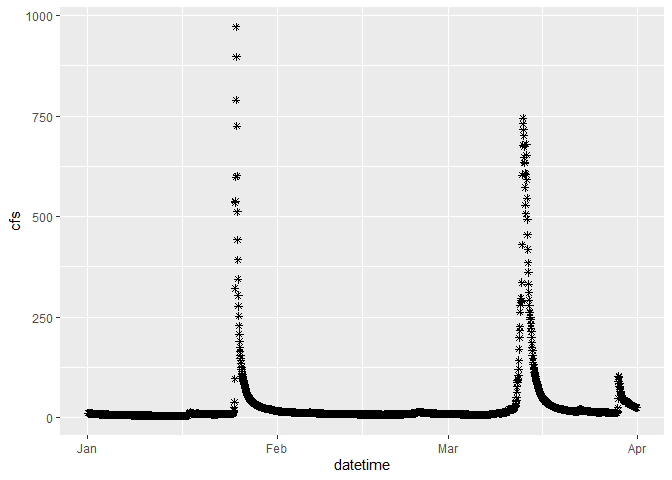

In [ ]:
ggplot(data = Pine, aes(x = datetime, y = cfs))+
  geom_point(pch = 8)

## Set colors

We can also “easily” change the color. Easily is in quotes because this
often trips people up. If you put color = “blue” in the aesthetic
function, think about what that is telling ggplot. It says “control the
color using”blue”“. That doesn’t make a whole lot of sense, so neither
does the output… Try it.

What happens is that if color = “blue” is in the aesthetic, you are
telling R that the color used in the geom represents “blue”. This is
very useful if you have multiple geoms in your plot, are coloring them
differently, and are building a legend. But if you are just trying to
color the points, it kind of feels like R is trolling you… doesn’t it?

Take the color = “blue” out of the aesthetic and you’re golden.

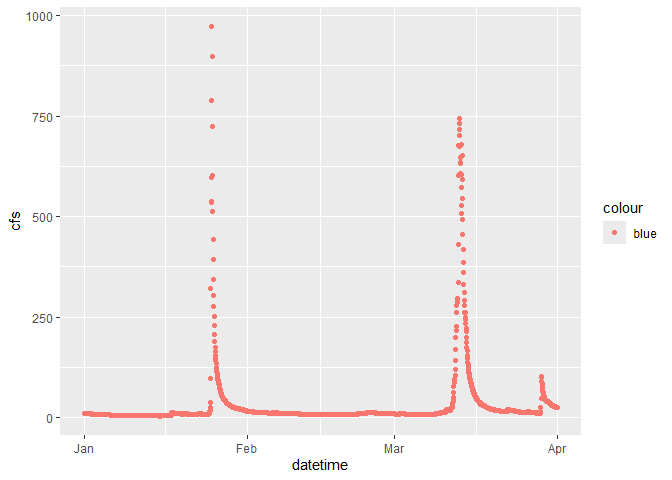

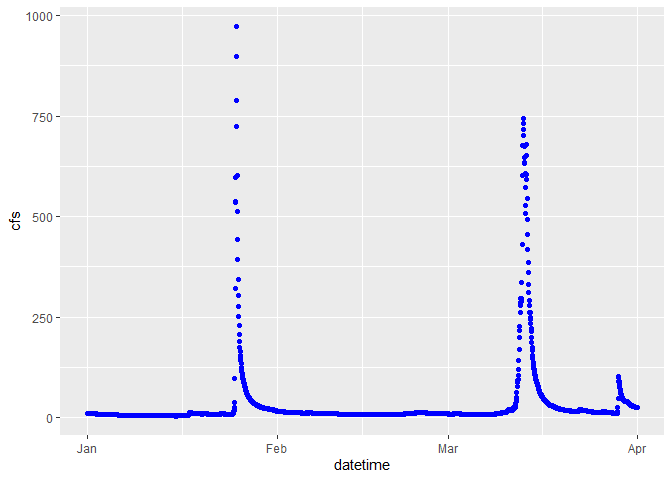

In [ ]:
ggplot(data = Pine, aes(datetime, y = cfs, color = "blue"))+
  geom_point()

## Controlling color with a third variable and other functions

Let’s plot the data as a line again, but play with it a bit.

First: make the line blue

Second: change the theme

Third: change the axis labels

Fourth: color by discharge

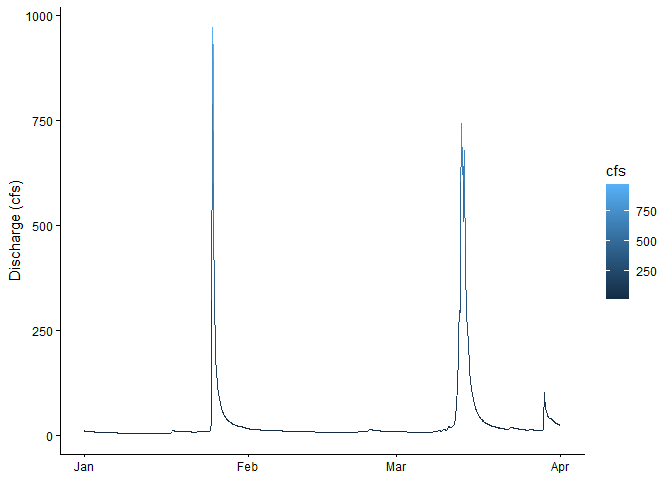

In [ ]:
ggplot(data = Pine, aes(x = datetime, y = cfs, color = cfs))+
  geom_line()+
  ylab("Discharge (cfs)")+
  xlab(element_blank())+
  theme_classic()

## Plotting multiple groups

The SNP dataset has two different streams: Pine and NFDR

We can look at the two of those a couple of different ways

First, make two lines, colored by the stream by adding color = to your
aesthetic.

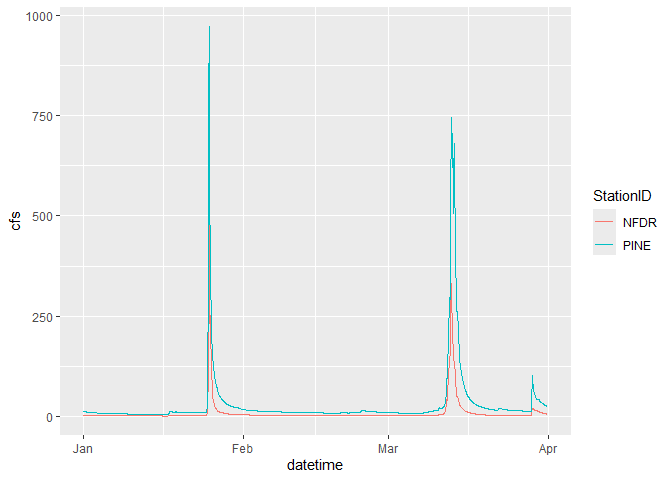

In [ ]:
ggplot(data = SNP, aes(x = datetime,y = cfs, color = StationID)) +
  geom_line()

## Facets

We can also use facets.

You must tell the facet_wrap what variable to use to make the separate
panels (facet =). It’ll decide how to orient them or you can tell it
how. We want them to be on top of each other so we are going to tell it
we want 2 rows by setting nrow = 2. Note that we have to put the column
used to make the facets in quotes after facets =

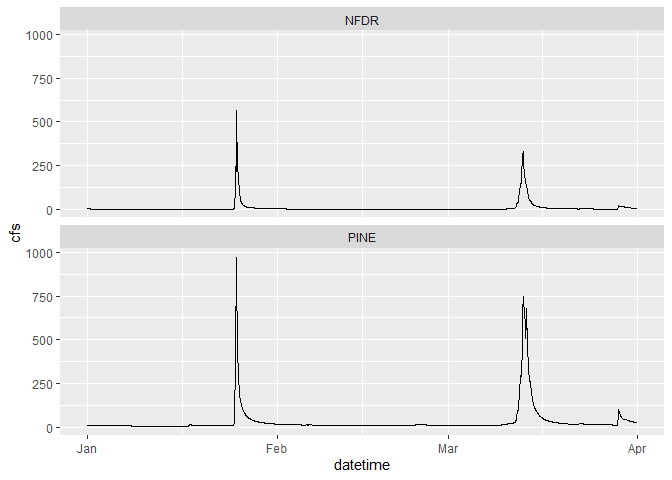

In [ ]:
ggplot(data = SNP, aes(x = datetime,y = cfs)) +
  geom_line() +
  facet_wrap(facets = "StationID", nrow = 2)

## Two variable faceting

You can also use facet_grid() to break your plots up into panels based
on two variables. Below we will create a panel for each month in each
watershed. Adding scales = “free” allows facet_grid to change the axes.
By default, all axes will be the same. This is often what we want, so we
can more easily compare magnitudes, but sometimes we are looking for
patterns more, so we may want to let the axes have whatever range works
for the individual plots.

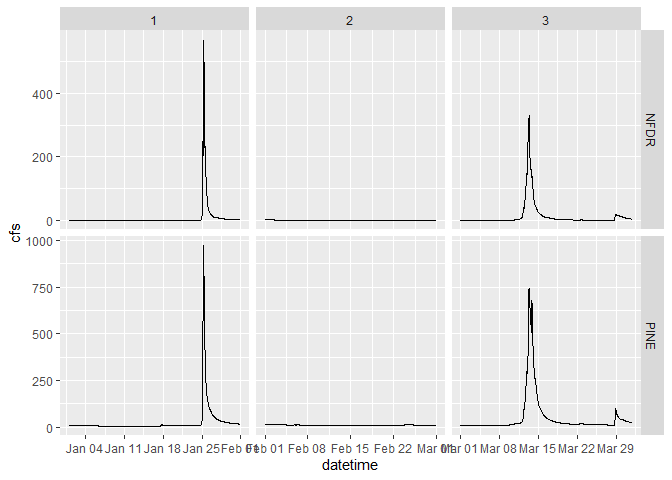

In [ ]:
ggplot(data = SNP, aes(x = datetime,y = cfs)) +
  geom_line() +
  facet_grid(StationID ~ month, scales = "free")

## Boxplots

We can look at these data in other ways as well. A very useful way to
look at the variation of two groups is to use a boxplot.

Because the data span several orders of magnitude, we will have to log
the y axis to see the differences between the two streams. We do that by
adding scale_y_log10()

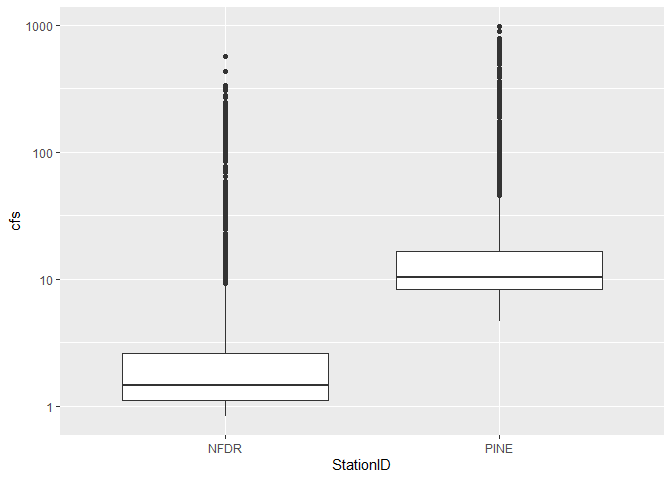

In [ ]:
ggplot(data = SNP, aes(x = StationID, y = cfs)) + 
  stat_boxplot()+
  scale_y_log10()

## More about color, size, etc

Let’s play around a bit with controlling color, point size, etc with
other data.

We can control the size of points by putting size = in the aes() and
color by putting color =

If you use a point type that has a background, like #21, you can also
set the background color using bg =

If points are too close together to see them all you can use a hollow
point type or set the alpha lower so the points are transparent (alpha =
)

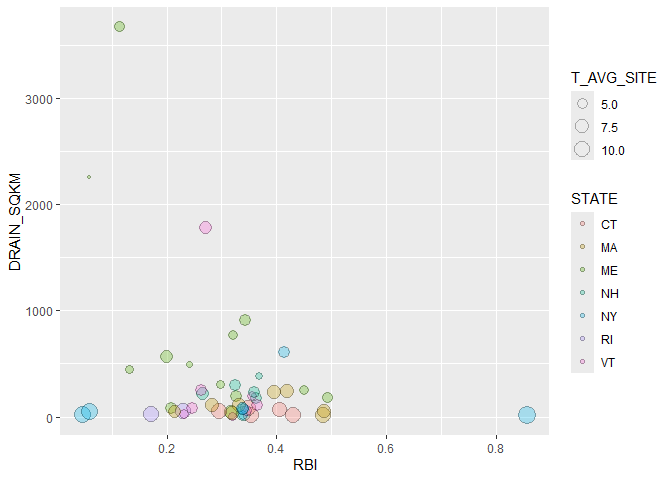

In [ ]:
ggplot(RBI, aes(RBI, DRAIN_SQKM, size = T_AVG_SITE, bg = STATE))+
  geom_point(pch = 21, alpha = 0.3)

## Multiple geoms

Finally: You can add multiple geoms to the same plot. Examples of when
you might want to do this are when you are showing a line fit and want
to show the points as well, or maybe showing a boxplot and want to show
the data behind it. You simply add additional geom\_… lines to add
additional geoms.

`geom_smooth()` using formula = 'y ~ x'

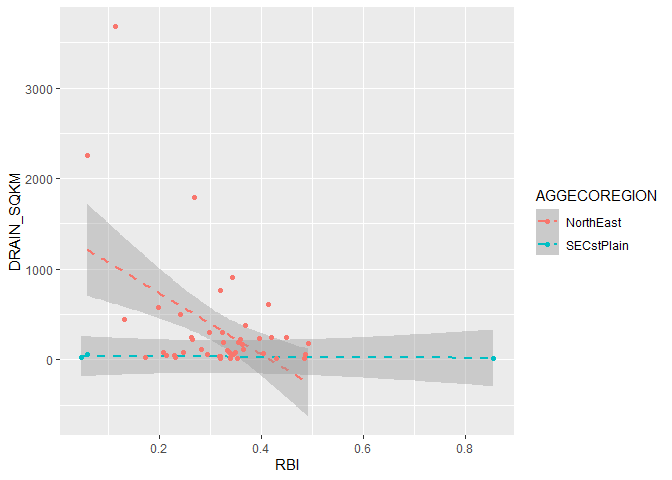

In [ ]:
ggplot(RBI, aes(RBI, DRAIN_SQKM, color = AGGECOREGION))+
  stat_smooth(method = "lm", linetype = 2)+
  geom_point()